<a href="https://colab.research.google.com/github/ForestMassi/Defects-statistics/blob/main/Defects_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn import preprocessing
#from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Dataset per python.xlsx to Dataset per python.xlsx


In [ ]:
df = pd.read_excel("Dataset per python.xlsx", engine="openpyxl")
print(df)

      Pan date  Pan number  Defect ID  Num ID  Area [µm^2]  Aspect ratio  \
0   2023-04-12         NaN       2726       1         3300      1.302083   
1   2023-04-12         NaN       2748       2          400      9.321429   
2   2023-04-12         NaN       2755       3         4900     12.635783   
3   2023-04-12         NaN       2754       4        16100      4.476569   
4   2023-04-12         NaN       2756       5         8200      8.369198   
..         ...         ...        ...     ...          ...           ...   
993 2023-05-24         NaN      10755     999        21100      1.217018   
994 2023-05-24         NaN      10849    1000        18500      2.004534   
995 2023-05-24         NaN      11358    1001        11500     11.775316   
996 2023-05-24         NaN      11244    1002        13800      2.338624   
997 2023-05-24         NaN      11280    1003        44000      1.442317   

     Shape factor  Height  Width  Height B box [µm]  ...  Circle diameter  \
0        0

In [ ]:
#Drop delle features non utili: pan date, pan number, pan ID e merit
df = df.drop(df.columns[[0, 1, 2, 20]], axis=1)
print(df)

     Num ID  Area [µm^2]  Aspect ratio  Shape factor  Height  Width  \
0         1         3300      1.302083      0.746967    75.0   57.6   
1         2          400      9.321429      0.046727   104.4   11.2   
2         3         4900     12.635783      0.039885   395.5   31.3   
3         4        16100      4.476569      0.064535   563.6  125.9   
4         5         8200      8.369198      0.066344   396.7   47.4   
..      ...          ...           ...           ...     ...    ...   
993     999        21100      1.217018      0.789223   184.5  151.6   
994    1000        18500      2.004534      0.148776   397.9  198.5   
995    1001        11500     11.775316      0.026438   744.2   63.2   
996    1002        13800      2.338624      0.359753   221.0   94.5   
997    1003        44000      1.442317      0.649022   293.8  203.7   

     Height B box [µm]  Width B box [µm]  Eccentricity  Circle diameter  \
0               70.497            66.304      0.768000        64.820448 

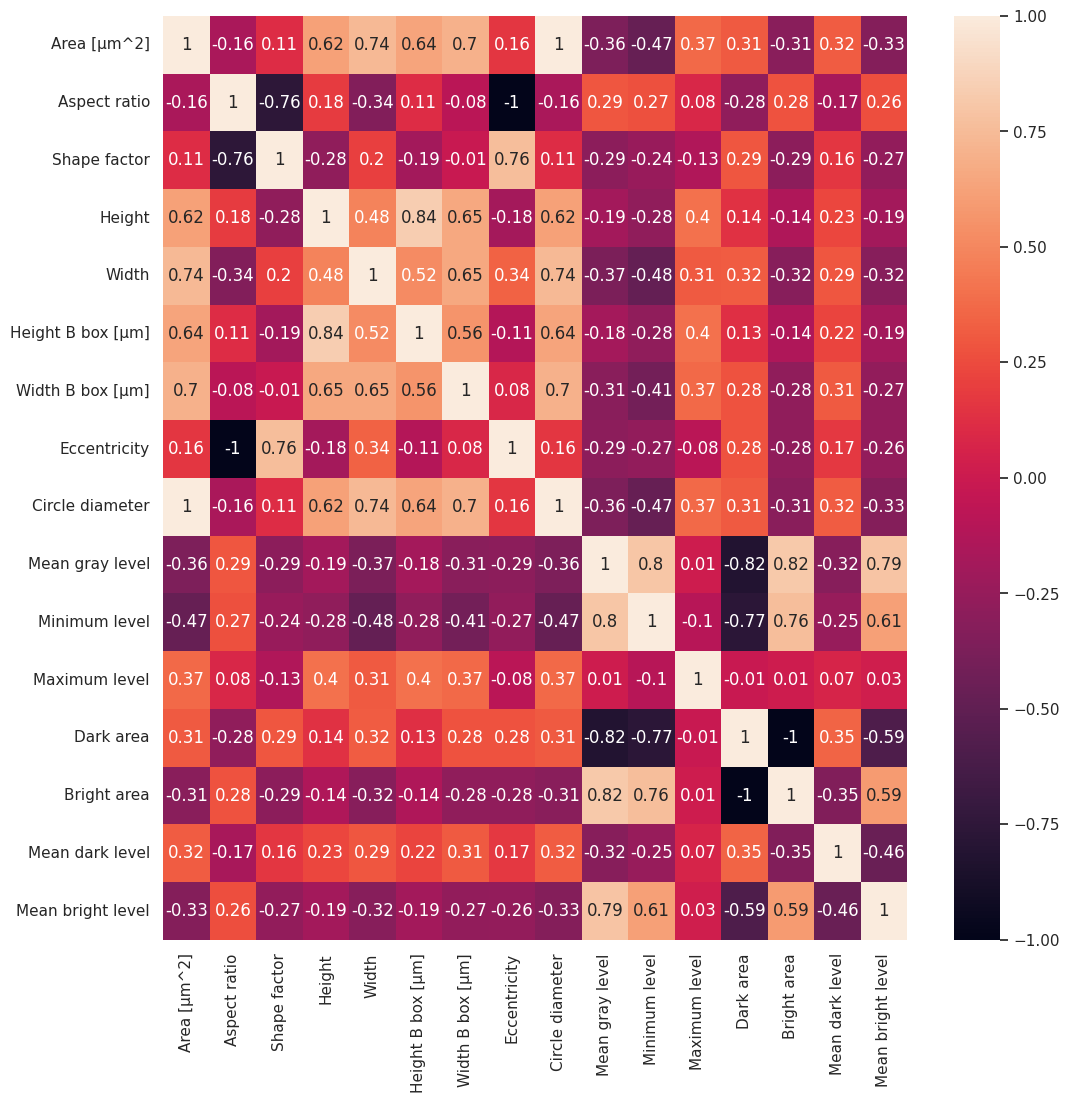

In [ ]:
#drop delle label, e del num_ID per fare la correlation matrix delle nostre features
df_nolab = df.drop(df.columns[[0, 17]], axis=1)
matrix = df_nolab.corr(method = 'kendall').round(2)
ax = plt.subplots(figsize =(12,12))
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#Value standardization
from sklearn.preprocessing import StandardScaler

df_noID = df.drop(df.columns[[0, 6, 7]], axis=1)
features = [ 'Area [µm^2]', 'Aspect ratio',  'Shape factor', 'Height',  'Width', 'Eccentricity',  'Circle diameter', 'Mean gray level',
            'Minimum level',  'Maximum level',  'Dark area',  'Bright area', 'Mean dark level',  'Mean bright level' ]

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['LABEL']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

print(x)

[[-0.44434929 -0.59124411  0.24509879 ... -0.94391017  0.86935513
  -2.43657162]
 [-0.54584851  1.01411895 -0.24507933 ...  0.76685639 -1.09530653
   0.43491524]
 [-0.38834971  1.67760725 -0.24986869 ...  0.76685639 -1.09530653
  -0.03971069]
 ...
 [-0.15735147  1.50535368 -0.25928201 ...  0.76685639 -1.09530653
  -0.03971069]
 [-0.07685208 -0.3837428  -0.02595658 ...  0.76685639 -1.09530653
   0.10267709]
 [ 0.98013986 -0.56317122  0.17653553 ... -0.05244492  1.01488563
  -0.49060532]]


In [ ]:
#2D PCA Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index=features)
loadings


,PC1,PC2
Area [µm^2],0.290747,0.365425
Aspect ratio,-0.171939,0.322118
Shape factor,0.062528,-0.174836
Height,0.155614,0.517285
Width,0.336160,0.263390
Eccentricity,0.205603,-0.308418
Circle diameter,0.354382,0.331688
Mean gray level,-0.267464,0.171555
Minimum level,-0.406548,0.072423
Maximum level,0.045322,0.158129


array([0.35257699, 0.17779128])

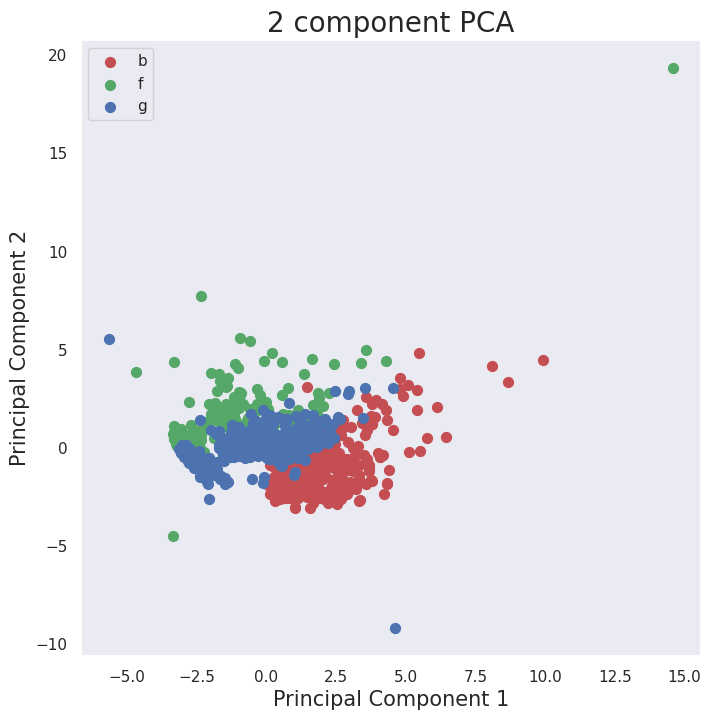

In [ ]:
#unisci il dataframe della PCA con la label
finalDf = pd.concat([principalDf, df[['LABEL']]], axis = 1)

#visualizza
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['b', 'f', 'g']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LABEL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

pca.explained_variance_ratio_